<h1>Data Science and Me</h1>

<h1>Section 1: Dataset</h1>

<h3>My dataset about League of Legends</h3>
<p>This dataset contains comprehensive player statistics from the 2024 League of Legends World Championship, focusing on in-game performance and strategic metrics. Key player stats include traditional performance measures (e.g., KDA, win rate) as well as advanced metrics such as vision score per minute (VSPM), wards placed per minute (WPM), and gold differential at 15 minutes (GD@15). Each row represents an individual player's performance throughout the tournament, providing insights into their strategic impact and in-game efficiency.</p>
<p>I chose the dataset about League of Legends because I have been playing this game since I was a child and I love it very much. Since I learned data science, I have become more and more interested in the data of players I meet every time I play a game, and I want to use the knowledge I have learned to analyze players' habits and win/lose situations.</p>

In [1]:
import pandas as pd
df = pd.read_csv('player_statistics_cleaned_final.csv')
df.shape
df.columns
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamName       81 non-null     object 
 1   PlayerName     81 non-null     object 
 2   Position       81 non-null     object 
 3   Games          81 non-null     int64  
 4   Win rate       81 non-null     float64
 5   KDA            81 non-null     float64
 6   Avg kills      81 non-null     float64
 7   Avg deaths     81 non-null     float64
 8   Avg assists    81 non-null     float64
 9   CSPerMin       81 non-null     float64
 10  GoldPerMin     81 non-null     int64  
 11  KP%            81 non-null     float64
 12  DamagePercent  81 non-null     float64
 13  DPM            81 non-null     int64  
 14  VSPM           81 non-null     float64
 15  Avg WPM        81 non-null     float64
 16  Avg WCPM       81 non-null     float64
 17  Avg VWPM       81 non-null     float64
 18  GD@15       

,TeamName,PlayerName,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,...,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Country,FlashKeybind
0,Top Esports,369,Top,8,0.500,3.1,2.5,2.4,4.9,7.6,...,0.13,322,5,424,0.000,0.250,0,2,China,D
1,Dplus KIA,aiming,Adc,9,0.333,4.8,5.0,2.0,4.7,10.1,...,0.10,-112,1,97,0.333,0.000,0,2,South Korea,F
2,MAD Lions KOI,alvaro,Support,5,0.200,1.5,0.2,4.4,6.2,1.2,...,0.49,-3,2,-256,0.000,0.600,0,-,Spain,D
3,Team Liquid,apa,Mid,10,0.500,2.4,3.5,3.2,4.2,8.7,...,0.18,278,2,216,0.400,0.000,0,3,United States,D
4,PSG Talon,azhi,Top,5,0.200,2.3,2.2,3.0,4.8,7.5,...,0.18,-311,-10,-168,0.200,0.000,0,-,Taiwan,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Team Liquid,yeon,Adc,10,0.500,4.9,3.8,1.8,5.0,10.0,...,0.16,224,6,571,0.500,0.000,0,-,United States,D
77,G2 Esports,yike,Jungle,8,0.375,4.5,3.1,2.4,7.6,6.4,...,0.22,102,4,-80,0.250,0.000,0,2,Sweden,D
78,Hanwha Life Esports,zeka,Mid,12,0.500,3.6,3.8,2.8,6.2,9.1,...,0.24,288,2,66,0.250,0.167,0,1,South Korea,F
79,T1,zeus,Top,8,0.875,7.1,3.9,1.6,7.6,7.9,...,0.19,633,8,370,0.125,0.000,0,2,South Korea,F


<h1>Section 2: Exploratory Data Analysis

<p>In this section, I want to know how people in different position (like Top for top laner, Mid for mid laner, Jungler, Adc and the Sup for Support) act differently. This will show up in some datas we will explore in following subsections with codes.</p>

<p>Firstly, we want to know what is the difference among different position, and answer the question: Which position has the highest win rate, is it reliable?</p>

In [2]:
avg_win_rate_by_position = df.groupby('Position')['Win rate'].mean().reset_index()
avg_win_rate_by_position

,Position,Win rate
0,Adc,0.456125
1,Jungle,0.455412
2,Mid,0.456125
3,Support,0.456125
4,Top,0.456125


<p>This data impressed me since every postion does not even have a win rate in World Championship 2024, and it seems every position has exactly the same win rate except for the junglers. Let's move on to see how it will look like for different teams.</p>

In [3]:
avg_win_rate_by_team = df.groupby('TeamName')['Win rate'].mean().reset_index()
avg_win_rate_by_team

,TeamName,Win rate
0,Bilibili Gaming,0.629833
1,Dplus KIA,0.333000
2,FlyQuest,0.500000
3,Fnatic,0.333000
4,G2 Esports,0.375000
5,GAM Esports,0.375000
6,Gen.G,0.700000
7,Hanwha Life Esports,0.500000
8,LNG Esports,0.625000
9,MAD Lions KOI,0.200000


<p> Firstly, congratulations for champion team T1 which has the highest win rate! Going back to our previous question, can win rate really reflect the importance of different positions? As we can see in these datasets, the win rate can directly reflect the rank for each team, but for differet postion, the win rate doesn't show up any difference for us. So, let's move on to explore more info that can reflect the importance among different positions.</p>

In [4]:
high_win_rate_df = df[df['Win rate'] > 0.50]
print(high_win_rate_df[['TeamName','PlayerName', 'Win rate', 'Position']])
position_counts = high_win_rate_df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Number of Players']
position_counts

           TeamName PlayerName  Win rate Position
6   Bilibili Gaming        bin     0.667      Top
7      Weibo Gaming    breathe     0.615      Top
11            Gen.G     canyon     0.700   Jungle
14            Gen.G      chovy     0.700      Mid
17     Weibo Gaming      crisp     0.615  Support
23  Bilibili Gaming        elk     0.667      Adc
26               T1      faker     0.875      Mid
28      LNG Esports       gala     0.625      Adc
29               T1   gumayusi     0.875      Adc
30      LNG Esports       hang     0.625  Support
38               T1      keria     0.875  Support
40            Gen.G       kiin     0.700      Top
42  Bilibili Gaming     knight     0.667      Mid
44            Gen.G    lehends     0.700  Support
46     Weibo Gaming      light     0.615      Adc
55  Bilibili Gaming         on     0.667  Support
56               T1       oner     0.875   Jungle
59            Gen.G       peyz     0.700      Adc
62      LNG Esports      scout     0.625      Mid


,Position,Number of Players
0,Top,5
1,Jungle,5
2,Mid,5
3,Support,5
4,Adc,5


<p>Gold, as the most important element in the whole game, will directly affect the game. The gold differential means the difference of the gold between two players in the same lane(position), we want to see which postion has the most gold differential at 15 minutes in the game.</p>

In [5]:
sorted_gd15_df = df.sort_values(by='GD@15', ascending=False)
print(sorted_gd15_df[['PlayerName', 'Position', 'GD@15']].head(25))

     PlayerName Position  GD@15
26        faker      Mid    741
79         zeus      Top    633
39        kiaya      Top    450
56         oner   Jungle    420
7       breathe      Top    387
64         supa      Adc    382
0           369      Top    322
29     gumayusi      Adc    322
80         zika      Top    321
78         zeka      Mid    288
3           apa      Mid    278
69        viper      Adc    261
38        keria  Support    250
76         yeon      Adc    224
8   brokenblade      Top    224
74       xiaohu      Mid    221
42       knight      Mid    212
70          wei   Jungle    186
15       corejj  Support    185
18      delight  Support    172
17        crisp  Support    159
46        light      Adc    142
66         tian   Jungle    138
23          elk      Adc    129
27    fresskowy      Mid    125


<p>Needless to say, a strong team requires each player to have a high gold differential compared to the opposing team. This dataset tells us that the Top position is the position where the most gold differentials appear. It might give us an important clue to our analysis.</p>
<p>Also, the KDA(Kill-Death-Assist ratio, indicating performance balance) will give us more information</p>

In [6]:
sorted_kda_df = df.sort_values(by='KDA', ascending=False)
print(sorted_kda_df[['PlayerName', 'Position', 'KDA']].head(25))

   PlayerName Position  KDA
62      scout      Mid  9.3
29   gumayusi      Adc  9.1
59       peyz      Adc  8.4
14      chovy      Mid  7.8
38      keria  Support  7.5
28       gala      Adc  7.2
79       zeus      Top  7.1
56       oner   Jungle  6.8
11     canyon   Jungle  6.5
74     xiaohu      Mid  6.2
46      light      Adc  6.0
54       noah      Adc  5.9
75        xun   Jungle  5.3
60       quad      Mid  5.2
42     knight      Mid  5.0
76       yeon      Adc  4.9
26      faker      Mid  4.8
1      aiming      Adc  4.8
34   inspired   Jungle  4.7
77       yike   Jungle  4.5
23        elk      Adc  4.4
66       tian   Jungle  4.4
49      massu      Adc  4.4
5       betty      Adc  4.4
69      viper      Adc  4.2


<p>Wow! We can barely see Top laner here! It seems the Adc becomes the main stream of high KDA. It is getting more interesting to see how each lane affect the whole game.
<br>
In conclusion, only through the data we cannot certain how each lane perform in each game since they play absolutely different roles. But we can say, as the carrying postion, Adc is the most effective position during the whole game, and we will see in the future analysis.</p>

<h1>Section 3: Exploratory Data Visualization<h1>

<h5>In this section, we will use graphs to show some interesting analysis based on the dataset.<h5>

<p>Flash, as known as the most important spell in the game, the position of it on the keyboard (oftenly D or F) makes me curious. Since someone says the position of the flash will directly influence the fluency of combos. I will use a plot to see the number of players who use D flash and F flash and their average win rate.

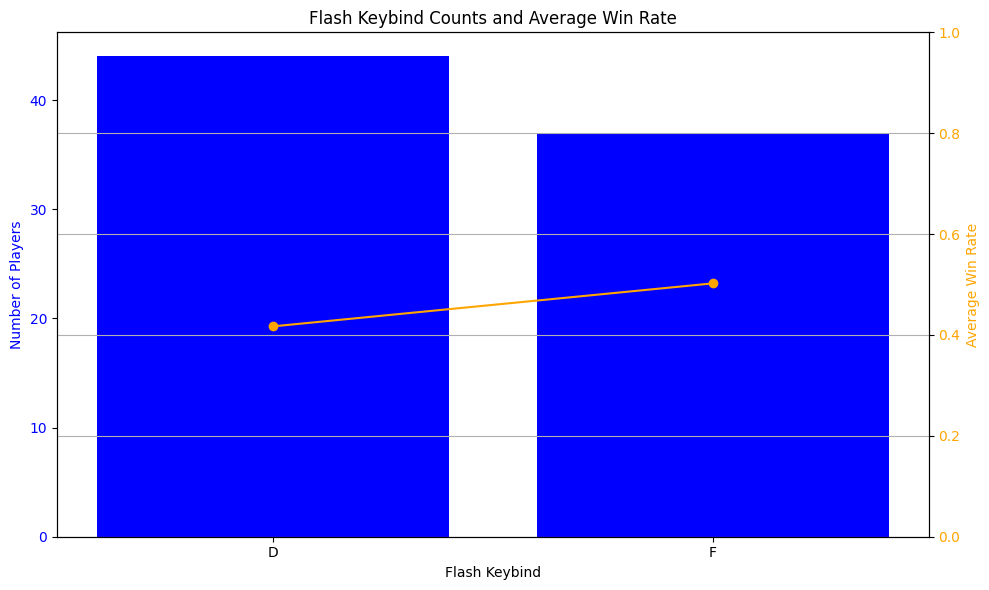

In [7]:
import matplotlib.pyplot as plt
flash_counts = df['FlashKeybind'].value_counts()
avg_win_rate = df.groupby('FlashKeybind')['Win rate'].mean()
flash_stats_df = pd.DataFrame({
    'Total Count': flash_counts,
    'Average Win Rate': avg_win_rate
}).reset_index()
flash_stats_df.columns = ['FlashKeybind', 'Total Count', 'Average Win Rate']
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(flash_stats_df['FlashKeybind'], flash_stats_df['Total Count'], color='blue', label='Total Count')
ax1.set_ylabel('Number of Players', color='blue')
ax1.set_xlabel('Flash Keybind')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(flash_stats_df['FlashKeybind'], flash_stats_df['Average Win Rate'], color='orange', marker='o', label='Average Win Rate')
ax2.set_ylabel('Average Win Rate', color='orange')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Flash Keybind Counts and Average Win Rate')
fig.tight_layout()
plt.grid(True)
plt.show()

<p>It is impressive, isn't it? There are more D-flash players but F-flash players has higher win rate! By the way, I'm also a F-flash player. :)
<br>
Alright, let's go back to our previous analysis and visualize it.</p>

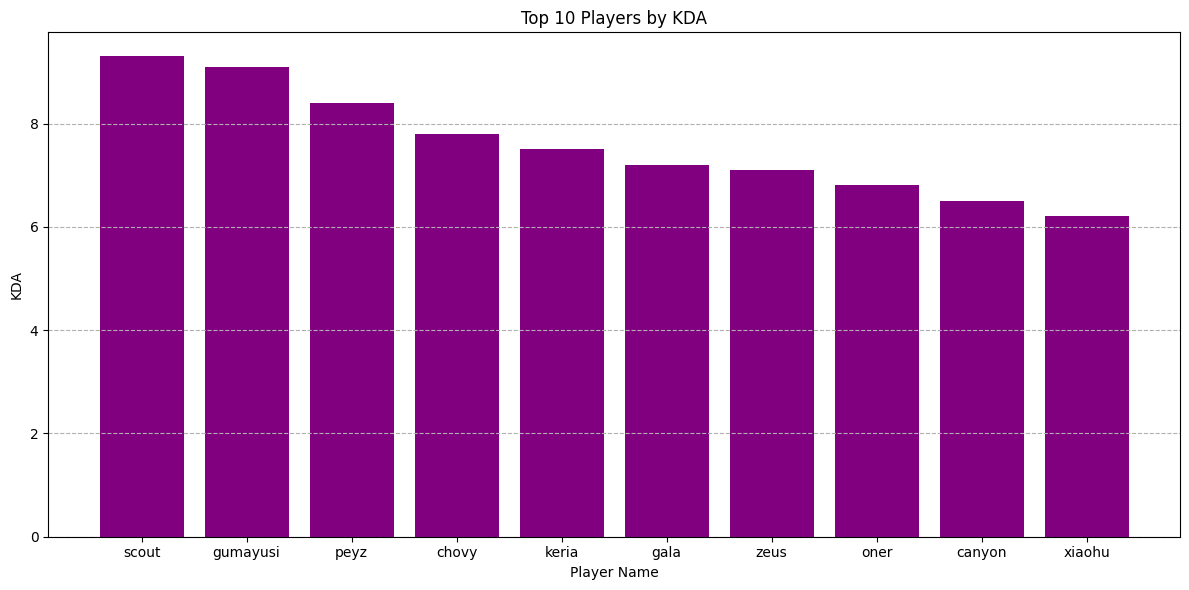

In [8]:

top_10_kda_df = sorted_kda_df.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_kda_df['PlayerName'], top_10_kda_df['KDA'], color='purple')
plt.title('Top 10 Players by KDA')
plt.xlabel('Player Name')
plt.ylabel('KDA')

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

<p>It seems if we only see the top 10 KDA of players, it doesn't show up any useful information for the analysis, so let's try to visualize it with average KDA with corresponding position.</p>

<Figure size 1000x600 with 0 Axes>

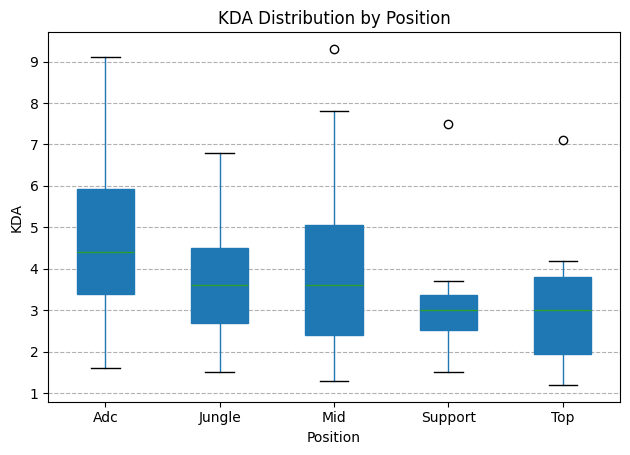

In [9]:
plt.figure(figsize=(10, 6))
df.boxplot(column='KDA', by='Position', grid=False, patch_artist=True)
plt.title('KDA Distribution by Position')
plt.suptitle('') 
plt.xlabel('Position')
plt.ylabel('KDA')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

<p>We can see: ADC: Highest median KDA among all roles. Wide range, with some players achieving exceptionally high KDAs.
<br>
Mid and Jungle: Similar KDA distributions with moderate medians and a few outliers.
<br>
Support: Generally has a lower KDA compared to other positions. The distribution is more compact, indicating less variation among players.
<br>
Top: Has a wide range of KDA values, with a median similar to Jungle.</p>

<h1>Section 4: Planning for Part II<h1>

<p>As far as we go throughout the analysis, we seem still not find a specific position which leads the game, we will see whether we can find or not in the part 2 analysis. Also, there are few more questions for part 2: Does KDA means everything? Does the data for Championship players reflect regular players like us? Which elements will cause those differences in different position? etc. 

<br>

In part II, I will answer the questions and follow up the analysis I did in part I. And I will also explore the pros and cons of data analysis, that is, can numbers show everything?

<h1>Section 5: Data Science

<p>In this section, we will find out how KDA shows up during the whole game. Before doing that, please allow me to introduce KDA again: KDA is the short of Kill/Death/Asistance, it shows the percentage of your participation around your whole team. For example, if your team gets 50 kills and the number of your kills plus asistance is 40, your participation rate will be 80%. Whether in a normal game or a global competition, the participation rate for a single play can rarely be 100%, but the higher rate means the player is more valuable. So we will start with participation rate for this section.

<br>

Firstly, we will use python to create a new colomn called "Participation Rate" counts the rate of participation for each player. Additionally, we will need a data which not provided by this dataset: Average one-side team kills per game, which is 13.5. Do players in different positions (e.g., Top, Mid, Adc, Support, Jungle) have significantly different average Participation Rates? Let's do a hypothesis test for this question. We have a significance level of 0.05.


In [21]:
average_team_kills = 13.5
df['Participation Rate (%)'] = ((df['Avg kills'] + df['Avg assists']) / average_team_kills) * 100
sorted_pr_data = df[['Position', 'PlayerName', 'Participation Rate (%)']].sort_values(by='Participation Rate (%)', ascending=False)
sorted_pr_data

,Position,PlayerName,Participation Rate (%)
38,Support,keria,97.777778
75,Jungle,xun,96.296296
56,Jungle,oner,94.814815
71,Jungle,weiwei,94.814815
42,Mid,knight,93.333333
...,...,...,...
2,Support,alvaro,47.407407
67,Adc,titan,41.481481
27,Mid,fresskowy,40.000000
72,Top,wizer,39.259259


<p>Null Hypothesis (H₀): The mean Participation Rate is the same across all positions.

H₀: μ_Top = μ_Mid = μ_Adc = μ_Support = μ_Jungle

Alternative Hypothesis (H₁): At least one position has a significantly different mean Participation Rate.

H₁: μ_i ≠ μ_j for at least one pair of positions

In [19]:
from statsmodels.stats.weightstats import ztest
pairwise_ztests = {}

positions = df['Position'].unique()
for i in range(len(positions)):
    for j in range(i + 1, len(positions)):
        pos1 = positions[i]
        pos2 = positions[j]
        pr_pos1 = df.loc[df['Position'] == pos1, 'Participation Rate (%)'].dropna()
        pr_pos2 = df.loc[df['Position'] == pos2, 'Participation Rate (%)'].dropna()
        z_stat, p_value = ztest(pr_pos1, pr_pos2, alternative="two-sided")
        pairwise_ztests[f"{pos1} vs {pos2}"] = (z_stat, p_value)
pairwise_results_df = pd.DataFrame.from_dict(pairwise_ztests, orient='index', columns=['Z-Statistic', 'P-Value'])
pairwise_results_df


,Z-Statistic,P-Value
Top vs Adc,-2.036259,0.041724
Top vs Support,-2.857607,0.004268
Top vs Mid,-1.532192,0.125475
Top vs Jungle,-2.917536,0.003528
Adc vs Support,-0.811992,0.416796
Adc vs Mid,0.423309,0.672070
Adc vs Jungle,-0.999521,0.317542
Support vs Mid,1.200047,0.230121
Support vs Jungle,-0.249954,0.802623
Mid vs Jungle,-1.360786,0.173581


<p>The results suggest that Participation Rate (PR) varies by position, especially for the Top lane, which shows significant differences compared to other positions (Adc, Support, Jungle) but not Mid. This means that Top players may contribute to their team's performance in a way that's measurably different from other lanes, in terms of kills and assists relative to team totals.

In [20]:
avg_pr_by_position = df.groupby('Position')['Participation Rate (%)'].mean().reset_index()
avg_pr_by_position.columns = ['Position', 'Average Participation Rate (%)']
avg_pr_by_position

,Position,Average Participation Rate (%)
0,Adc,70.601852
1,Jungle,75.686275
2,Mid,68.425926
3,Support,74.444444
4,Top,60.185185


<p>The PR may differ signicantly since there are so many map resources such as Drakes and Baron. Due to the importance of these resources, there might be more team fights, and the Jungler and Support are the positions which are resposible for these resources. This result shows us Jungle and Support are the mainstay for the control of map which directly affect the game result.

<br>

Now it seems we find our "leading position" from the hypothesis test, let's visualize it!!

<h1>Section 6: Data Visualization

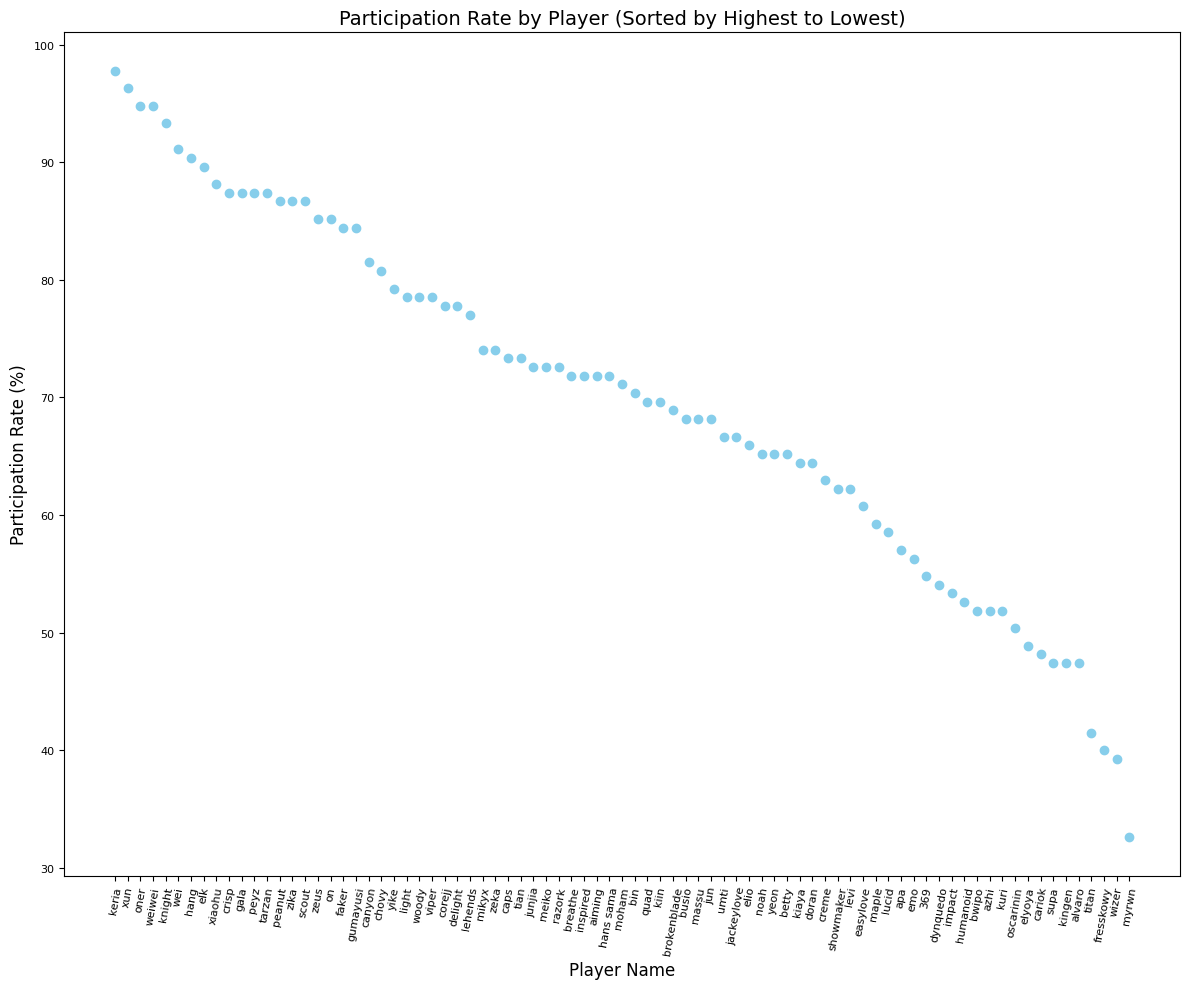

In [37]:
plt.figure(figsize=(12, 10))
plt.scatter(sorted_pr_data['PlayerName'], sorted_pr_data['Participation Rate (%)'], color='skyblue')
plt.xticks(sorted_pr_data.index, rotation=80, fontsize=8)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Participation Rate (%)', fontsize=12)
plt.title('Participation Rate by Player (Sorted by Highest to Lowest)', fontsize=14)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

<p>Here we can directly see PR for each player, I can tell you the top players are all Support and Jungler.

<br>

Although the map control is important, here is another key to the victory of a game: team fights. How can we visualize how each position perform in team fights? We can't, unfortunately, but we can still see it through damage dealt percentage.

<Figure size 1200x800 with 0 Axes>

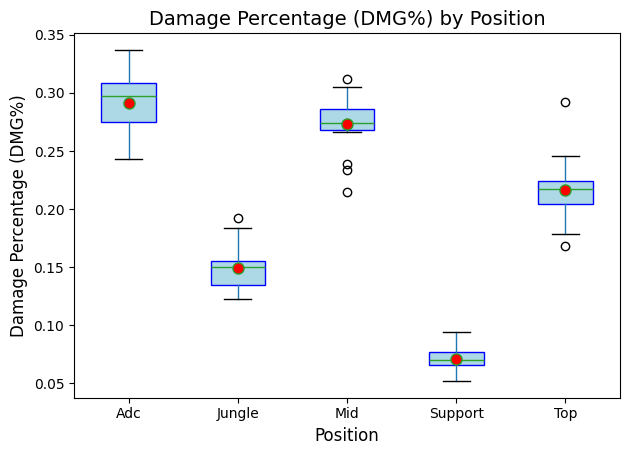

In [27]:
plt.figure(figsize=(12, 8))
df.boxplot(column='DamagePercent', by='Position', grid=False, showmeans=True, patch_artist=True,
             boxprops=dict(facecolor='lightblue', color='blue'),
             meanprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.xlabel('Position', fontsize=12)
plt.ylabel('Damage Percentage (DMG%)', fontsize=12)
plt.title('Damage Percentage (DMG%) by Position', fontsize=14)
plt.suptitle('') 
plt.tight_layout()
plt.show()

<p> ADC, the core position to deal damage, normally deals physical damage. Mid, another core postion to deal AP (Ability Power) for team. The plot perfectly shows the role of each position in a team fight. 

<h1>Section 7: Overall Summary

<p>The following project analyzed a dataset of the statistics of the players in League of Legends Championship World 2024. Sections 1-4 focused on understanding Kill/Death/Assist - a metric of performance. KDA distributions across different positions were visualized using a box plot; it showed that ADC players usually have higher KDA values, followed by Mid and Jungle postions. Individual players' ranking according to KDA also emerged, with individuals like Scout (9.3) and Gumayusi (9.1) topping the list. Again, other team-level metrics such as Win Rate were investigated to show top-performing teams like T1 at 87.5% and Gen.G at 70%. We also made some interesting analysis on Flash. 

<br>

Section 5-6: Attention was extended to PR and DMG% in these sections, metrics that indicate a player's influence in team fights. PR was calculated and visualized for all players, showing that Support and Jungle generally were above average: 97.78% for Keria and 96.3% for Xun. From hypothesis testing, statistically significant differences in PR are identified across positions. In a similar vein, Damage Percentage analysis puts great emphasis on the ADC role of being the primary damage dealer, while the second can be attributed to Mid. These trends have been visually compared across positions and individual players by using box plots and scatter plots.

<br>
Overall, this project shows us each position has its own role in the game, every position is indispensible, and that makes our 5 vs 5 game! From all analysis we made, we can see why the queue time in normal game is much shorter if you pick Jungle or Support for primary position (Because support and jungle need good understanding of "big picture" for the whole game! That's tough!!).  

